# Problem 7

http://www.pythonchallenge.com/pc/def/oxygen.html

In [1]:
from utils.web import get_image_from_url
import numpy as np
import matplotlib.pyplot as plt
from utils.general import list_of_chars_to_string

Get the image

(95, 629, 3)


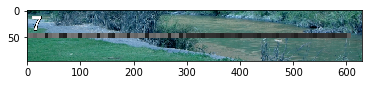

In [2]:
image = get_image_from_url('http://www.pythonchallenge.com/pc/def/oxygen.png').astype(np.int)
print image.shape
plt.imshow(image.astype('uint8'))

Find the coordinates of the grayscale pixels -> where all the 3 channels have the same value

In [3]:
masks = [np.abs(image[:,:,ch1] - image[:,:,ch2]) for ch1, ch2 in ((0,1), (0,2), (1,2))]
gray_mask = np.sum(masks, axis=0)
gray_idx_y, gray_idx_x = np.where(gray_mask == 0)

Plot the mask

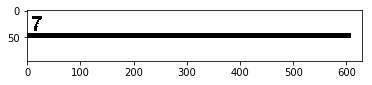

In [4]:
gray_mask_plot = gray_mask.copy()
gray_mask_plot[gray_mask_plot != 0] = 255
plt.imshow(gray_mask_plot.astype('uint8'), cmap='gray')

Since the number 7 drawn in the image is also grayscale (but we dont wan't it), take only the lines that contains x_max grayscale

In [5]:
gray_x_max = gray_idx_x.max()
where_gray_x_max = np.where(gray_idx_x == gray_x_max)
gray_idx_y_row = gray_idx_y[where_gray_x_max][0]

print 'Row', gray_idx_y_row

Row 43


In [6]:
# Select one gray row (the first one), only one channel (since they have the same value
gray_line = image[gray_idx_y_row, :gray_x_max + 1, 0]
# Sample one value every 7
changing_values = gray_line[::7]

In [7]:
print list_of_chars_to_string(map(chr, changing_values))

smart guy, you made it. the next level is [105, 110, 116, 101, 103, 114, 105, 116, 121]


In [8]:
print list_of_chars_to_string(map(chr, [105, 110, 116, 101, 103, 114, 105, 116, 121]))

integrity
